# Análise de redes sociais

![redes](images/snaimage.jpg)

## Objetivos

### => Extrair informações que gerem conexão entre as pessoas utilizando Web Scraping e Web Crawling;
### => Preparar os dados para análise;
### => Visualizar a rede complexa;
### => Compreender matematicamente a rede através de métricas apropriadas;
### => Aplicar algoritmos de agrupamento para  encontrar os clusters;
### => Identificar aplicações potenciais na rede estudada.
<br/><br/>

## Problema: Como as pessoas estão conectadas?
![rede](images/25demarco.jpg)
![rede](images/id_DS.png)
![rede](images/perguntas.png)

## Extração de informações utilizando Web Scraping e Web Crawling

### O que é Web Scraping e Web Crawling?

É o ato de baixar automaticamente, usando bots, os dados de uma página da web e extrair informações e hiperlinks contidos nela

![scraper](images/scraper.png)

## Estudo de caso - Social Network Analysis
Análise de redes sociais é o processo de investigar estruturas sociais através do uso de redes e teoria de grafos

### Importação dos dados

In [1]:
# bibliotecas
import pandas as pd

# dados
df = pd.read_csv("generico.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   From    59 non-null     object
 1   To      59 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


### Contrução da rede

In [2]:
# bibliotecas
import networkx as nx

# lendo a lista de arestas
G = nx.from_pandas_edgelist(df,source="From",target="To")
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 33
Number of edges: 57
Average degree:   3.4545


### Visualização da rede

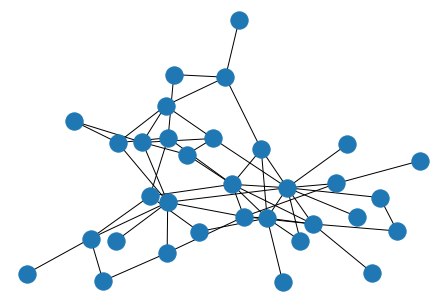

In [3]:
# bibliotecas
import matplotlib.pyplot as plt
%matplotlib inline

# sem identiticação
nx.draw(G)

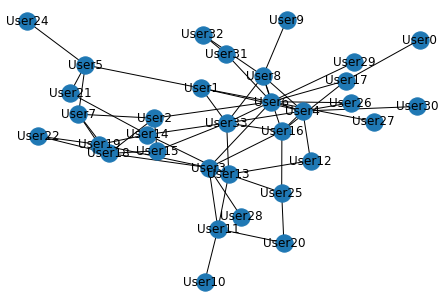

In [4]:
# com identificação
nx.draw(G, with_labels = True)

### Análise de métricas de centralidade

![importants](images/id-program-network.jpg)

#### Grau de Centralidade

+ Identificação de pessoas com o maior número de conexões;
+ Quem é o mais influente?

In [5]:
# grau de centralidade
nx.degree_centrality(G)

# mais influente
most_influential = nx.degree_centrality(G)

# imprimindo o resultado
for pessoa in sorted(most_influential, key=most_influential.get, reverse=True):
    print(pessoa, most_influential[pessoa])

User6 0.34375
User4 0.25
User33 0.25
User3 0.21875
User8 0.1875
User16 0.1875
User18 0.15625
User5 0.125
User7 0.125
User2 0.125
User19 0.125
User13 0.125
User14 0.125
User1 0.125
User11 0.125
User17 0.09375
User25 0.09375
User15 0.09375
User22 0.0625
User21 0.0625
User20 0.0625
User31 0.0625
User26 0.0625
User32 0.0625
User12 0.0625
User24 0.03125
User28 0.03125
User29 0.03125
User0 0.03125
User30 0.03125
User27 0.03125
User9 0.03125
User10 0.03125


(-1.078201326088876,
 1.0989619679089941,
 -0.9318695484170358,
 0.9767571436440781)

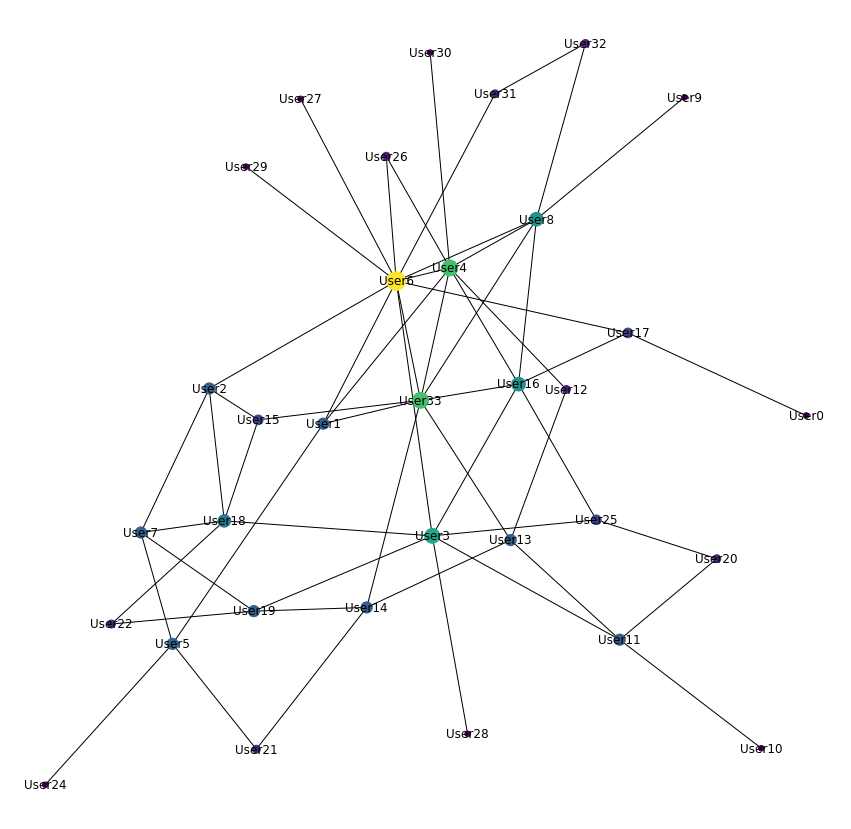

In [6]:
# vizualização
pos = nx.spring_layout(G)
tamanho = nx.degree_centrality(G)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 1000 for v in tamanho.values()]
plt.figure(figsize=(15,15))
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

#### Centralidade do Autovetor

+ Conexão mais importante;
+ Você sabe com quem estou relacionado?

“Diga-me quem são seus amigos e eu irei dizer quem você é.”

In [7]:
# eigenvector centrality
nx.eigenvector_centrality(G)

# mais influente
most_important_link = nx.eigenvector_centrality(G)

# imprimindo o resultado
for pessoa in sorted(most_important_link, key=most_important_link.get, reverse=True):
    print(pessoa, most_important_link[pessoa])

User6 0.43129548618226227
User33 0.3913727487640169
User4 0.3828103770055443
User8 0.31347467182951655
User16 0.29776341834023196
User1 0.24388304663739876
User3 0.22133480262245114
User26 0.15546336529985463
User17 0.1444919802023684
User2 0.14363901427756204
User13 0.1318753975708016
User15 0.12436791995571679
User14 0.1240044552262034
User18 0.11625116735156223
User25 0.10579187177730066
User12 0.0982854609567167
User31 0.09734219799107341
User19 0.088751453287367
User29 0.08236122613955657
User27 0.08236122613955657
User7 0.08026143255422868
User32 0.07845033246513204
User11 0.07691864616776486
User30 0.07310213916029808
User5 0.07164776716208777
User9 0.05986167944506465
User28 0.04226717628705331
User22 0.03914904417049192
User21 0.03736261927044778
User20 0.03489129028910792
User0 0.027592509951879913
User10 0.014688819386746151
User24 0.013682238743969927


(-1.0363578576996377,
 0.9809828210108463,
 -0.6815074616198906,
 1.0800717838866614)

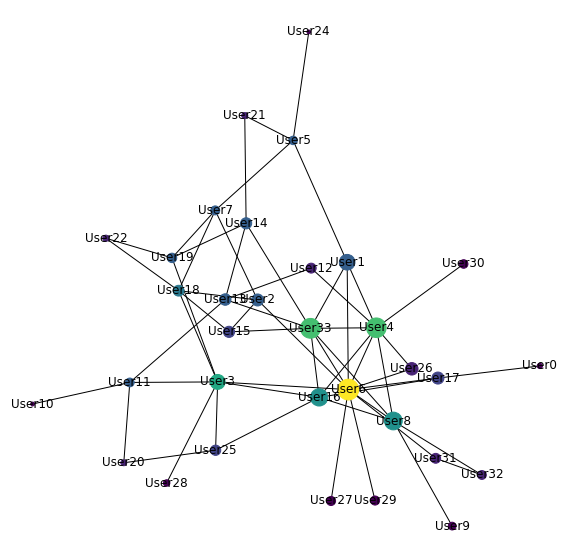

In [8]:
# vizualização
pos = nx.spring_layout(G)
tamanho = nx.eigenvector_centrality(G)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 1000 for v in tamanho.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

#### Centralidade de Proximidade
 
+ Mede quanto “tempo” é necessário para que uma informação seja difundida a partir de uma pessoa até todas as outras da rede;
+ O quão perto uma pessoa estás das demais na rede?

In [9]:
print(nx.diameter(G),'pessoas, em média, separam quaisquer pessoas na rede!')

6 pessoas, em média, separam quaisquer pessoas na rede!


In [10]:
# closeness centrality
nx.closeness_centrality(G)

# mais influente
best_prox = nx.closeness_centrality(G)

# imprimindo o resultado
for pessoa in sorted(best_prox, key=best_prox.get, reverse=True):
    print(pessoa, best_prox[pessoa])

User6 0.5517241379310345
User33 0.5079365079365079
User3 0.48484848484848486
User4 0.463768115942029
User16 0.463768115942029
User8 0.4383561643835616
User1 0.43243243243243246
User2 0.4155844155844156
User14 0.4155844155844156
User13 0.4050632911392405
User19 0.3950617283950617
User18 0.3855421686746988
User17 0.3855421686746988
User15 0.38095238095238093
User25 0.3764705882352941
User26 0.3764705882352941
User11 0.37209302325581395
User7 0.367816091954023
User31 0.367816091954023
User29 0.3595505617977528
User27 0.3595505617977528
User12 0.3595505617977528
User5 0.3516483516483517
User28 0.32989690721649484
User21 0.32
User30 0.32
User32 0.3137254901960784
User9 0.3076923076923077
User22 0.29906542056074764
User20 0.29906542056074764
User0 0.2807017543859649
User10 0.27350427350427353
User24 0.26229508196721313


(-1.065414581820837,
 1.0983530753248019,
 -0.8745254405719802,
 0.7845753878128128)

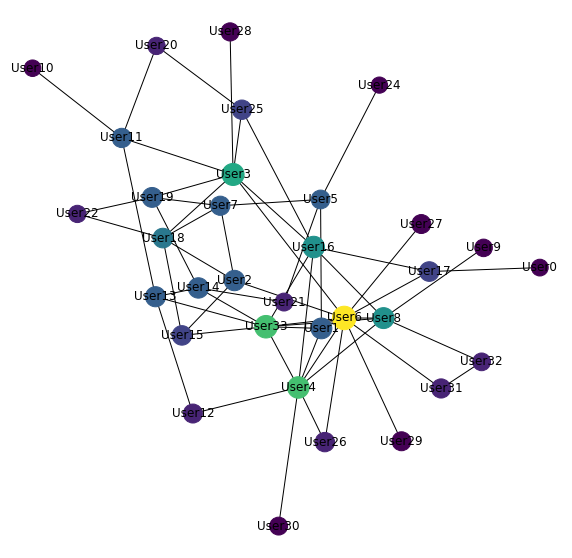

In [11]:
# vizualização
pos = nx.spring_layout(G)
tamanho = nx.closeness_centrality(G)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 1000 for v in tamanho.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

#### Centralidade de Intermediação

+ Pontes/Intermediários/hubs;
+ Ajudantes ou conectores de destino;
+ Nós com alta centralidade de intermediação ocupam posições estratégicas a rede;
+ Disseminação de informação é mais eficiente.

In [12]:
# betweenness centrality
nx.betweenness_centrality(G)

# melhor conector
best_conector = nx.betweenness_centrality(G)

# imprimindo o resultado
for pessoa in sorted(best_conector, key=best_conector.get, reverse=True):
    print(pessoa, best_conector[pessoa])

User6 0.3642953149001535
User3 0.25297139016897086
User33 0.15096966205837173
User4 0.12928667434715824
User8 0.11043586789554531
User16 0.10398425499231952
User11 0.09522849462365592
User5 0.08582469278033794
User1 0.08568548387096774
User14 0.06612423195084485
User17 0.06433371735791091
User18 0.06256720430107525
User19 0.05959581413210447
User13 0.052654569892473115
User2 0.04838229646697388
User7 0.04110023041474654
User25 0.03380376344086021
User15 0.013488863287250383
User31 0.012701612903225806
User21 0.008064516129032258
User12 0.004704301075268817
User20 0.0026881720430107525
User32 0.0023521505376344082
User22 0.0015793010752688172
User24 0.0
User28 0.0
User29 0.0
User0 0.0
User30 0.0
User27 0.0
User26 0.0
User9 0.0
User10 0.0


(-1.0886881357073865,
 0.8624508498551154,
 -0.6896820525652672,
 0.893110972488905)

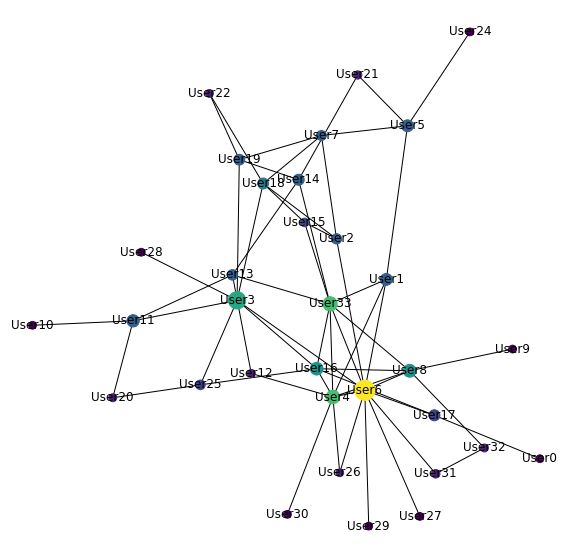

In [13]:
# vizualização
pos = nx.spring_layout(G)
tamanho = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 1000 for v in tamanho.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

### Análise de métricas estruturais

#### Equilíbrio social

O equilíbrio social não se refere a algum conceito zen de equilíbrio ou a um estado de paz. Na verdade, tem mais a ver com conflito do que com paz. O equilíbrio social é uma teoria relativa à estrutura dos *links negativos*, ou seja, links que têm uma conotação negativa, como ódio ou guerra. Eles podem ser apresentados como um tipo separado de link ou como links com algum peso contínuo, que também pode ser negativo.

A base da teoria é que, se dois nós estiverem conectados positivamente, eles deverão estar conectados de maneira semelhante a outro terceiro: ambos devem ter relações positivas ou ambos devem ter relações negativas. 

A idéia do equilíbrio social é que as tríades desequilibradas também são instáveis e tendem a desaparecer, enquanto as tríades equilibradas tendem a ser estáveis. 

![triads](images/triads.png)

In [14]:
# triangles
trian=nx.triangles(G)

# imprimindo o resultado
for pessoa in sorted(trian, key=trian.get, reverse=True):
    print(pessoa, trian[pessoa])

User4 8
User33 8
User6 6
User8 5
User16 4
User1 3
User2 2
User18 2
User7 1
User3 1
User25 1
User26 1
User13 1
User14 1
User15 1
User5 0
User19 0
User22 0
User21 0
User24 0
User17 0
User28 0
User29 0
User0 0
User30 0
User20 0
User31 0
User27 0
User32 0
User12 0
User11 0
User9 0
User10 0


#### Coeficiente de Agrupamento

Algumas teorias sociais consideram tríades como sendo unidades essenciais de análise de redes sociais.

O coeficiente de agrupamento é a fração de triângulos possíveis que contêm o nó do ego, se existir.

Se o coeficiente de agrupamento de um nó for 1, o nó participará de todos os triângulos possíveis envolvendo qualquer par de seus vizinhos; a rede egocêntrica desse nó é um grafo completo. Se o coeficiente de agrupamento de um nó for 0, nenhum nó na vizinhança está conectado; a rede egocêntrica desse nó é uma estrela. 


In [15]:
# coeficiente de cluster de todos os nós (retorna um dicionário)
coef_clus=nx.clustering(G)

# imprimindo o resultado
for pessoa in sorted(coef_clus, key=coef_clus.get, reverse=True):
    print(pessoa, coef_clus[pessoa])
    
# coeficiente de cluster da rede
print("Coeficiente de agrupamento da rede:",nx.average_clustering(G))

User26 1.0
User1 0.5
User2 0.3333333333333333
User25 0.3333333333333333
User8 0.3333333333333333
User15 0.3333333333333333
User4 0.2857142857142857
User33 0.2857142857142857
User16 0.26666666666666666
User18 0.2
User7 0.16666666666666666
User13 0.16666666666666666
User14 0.16666666666666666
User6 0.10909090909090909
User3 0.047619047619047616
User5 0
User19 0
User22 0
User21 0
User24 0
User17 0
User28 0
User29 0
User0 0
User30 0
User20 0
User31 0
User27 0
User32 0
User12 0
User11 0
User9 0
User10 0
Coeficiente de agrupamento da rede: 0.13721631903450085


#### Densidade

+ Um grafo é dito denso quando possui muitas arestas para uma determinada quantidade de vértices

In [16]:
nx.density(G)

0.10795454545454546

#### Homofilia - Assortividade

+ Tendência de conexão entre nós que possuem característica similar.

Se dois nós têm maior probabilidade de serem conectados quando compartilham um determinado atributo, isso é conhecido como *homofilia* ou *assortividade*.

In [17]:
# o grau de assortividade varia de -1 a 1
nx.degree_assortativity_coefficient(G)

-0.11363724993175504

#### Furos estruturais - brokers

+ Pessoas nessa posição de um "buraco estrutural" também são chamadas de "brokers";

+ Pensa-se também que os orifícios estruturais têm mais oportunidades de inovação e criatividade. Na interface de diferentes grupos, as pessoas que ocupam buracos estruturais podem ouvir muito mais e diversas informações. Isso poderia permitir a integração dessas informações diversas em algo novo.

In [18]:
# furos estruturais
nx.constraint(G)

# brokers
brokers = nx.constraint(G)

# imprimindo o resultado
for pessoa in sorted(brokers, key=brokers.get):
    print(pessoa, brokers[pessoa])

User6 0.13996499081726355
User3 0.16609977324263037
User33 0.22442464416896235
User4 0.23781135215794305
User8 0.24855642919089888
User16 0.24953349395313676
User5 0.25
User19 0.25
User11 0.25
User13 0.3017578125
User14 0.3017578125
User18 0.30527777777777776
User7 0.31265624999999997
User17 0.3333333333333333
User1 0.34496061466942146
User2 0.39918402777777773
User25 0.4074703955656336
User15 0.4447222222222222
User22 0.5
User21 0.5
User20 0.5
User31 0.5
User32 0.5
User12 0.5
User26 0.6139269111570247
User24 1.0
User28 1.0
User29 1.0
User0 1.0
User30 1.0
User27 1.0
User9 1.0
User10 1.0


(-0.9073952236690179,
 1.090828343984239,
 -0.7336465170445045,
 0.907810864154784)

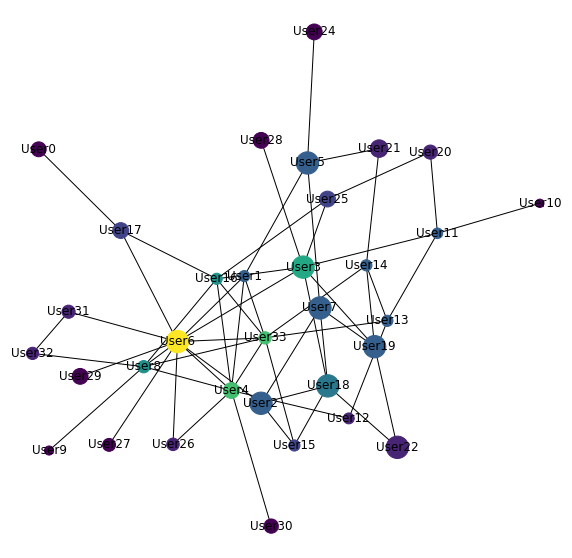

In [19]:
# vizualização
pos = nx.spring_layout(G)
tamanho = nx.constraint(G)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 500 for v in tamanho.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=sorted(node_size,reverse=True))
plt.axis('off')

#### Cliques

+ Descoberta das equipes que cooperam estreitamente na rede social.

In [20]:
# Extract Cliques
list(nx.find_cliques(G))

[['User28', 'User3'],
 ['User32', 'User31'],
 ['User32', 'User8'],
 ['User11', 'User3'],
 ['User11', 'User10'],
 ['User11', 'User13'],
 ['User11', 'User20'],
 ['User7', 'User19'],
 ['User7', 'User18', 'User2'],
 ['User7', 'User5'],
 ['User18', 'User2', 'User15'],
 ['User18', 'User3'],
 ['User18', 'User22'],
 ['User9', 'User8'],
 ['User16', 'User17'],
 ['User16', 'User3', 'User25'],
 ['User16', 'User8', 'User33', 'User4'],
 ['User0', 'User17'],
 ['User21', 'User5'],
 ['User21', 'User14'],
 ['User5', 'User1'],
 ['User5', 'User24'],
 ['User12', 'User4'],
 ['User12', 'User13'],
 ['User20', 'User25'],
 ['User6', 'User2'],
 ['User6', 'User27'],
 ['User6', 'User31'],
 ['User6', 'User17'],
 ['User6', 'User3'],
 ['User6', 'User4', 'User33', 'User1'],
 ['User6', 'User4', 'User33', 'User8'],
 ['User6', 'User4', 'User26'],
 ['User6', 'User29'],
 ['User15', 'User33'],
 ['User19', 'User3'],
 ['User19', 'User22'],
 ['User19', 'User14'],
 ['User30', 'User4'],
 ['User13', 'User33', 'User14']]

### Detecção de comunidades - clusters

Propriedade comum em redes sociais, que representa “ciclos de amigos comuns”, onde todo membro conhece todos os outros membros.

![clusters](images/clusters.png)

In [30]:
# algoritmo de Louvain

import community as community_louvain

part = community_louvain.best_partition(G)

spring_pos = nx.spring_layout(G)

values = [part.get(node) for node in G.nodes()]

plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos = spring_pos, cmap = plt.get_cmap("jet"), 
                 node_color = values, node_size = 200, with_labels = True)
plt.axis('off')

In [31]:
part_as_series = pd.Series(part)
print(part_as_series.sort_values())

print(part_as_series.value_counts())

In [22]:
# Edge Betweenness Community - algoritmo de Girvan Newman

from networkx.algorithms import community

communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['User0',
  'User1',
  'User12',
  'User16',
  'User17',
  'User26',
  'User27',
  'User29',
  'User30',
  'User31',
  'User32',
  'User33',
  'User4',
  'User6',
  'User8',
  'User9'],
 ['User10', 'User11', 'User13', 'User20', 'User25', 'User28', 'User3'],
 ['User14',
  'User15',
  'User18',
  'User19',
  'User2',
  'User21',
  'User22',
  'User24',
  'User5',
  'User7']]

In [23]:
# Bipartitions - Kernighan–Lin

kl_partitions = community.kernighan_lin_bisection(G)
list(kl_partitions)

[{'User0',
  'User1',
  'User16',
  'User17',
  'User24',
  'User26',
  'User27',
  'User29',
  'User30',
  'User31',
  'User32',
  'User33',
  'User4',
  'User6',
  'User8',
  'User9'},
 {'User10',
  'User11',
  'User12',
  'User13',
  'User14',
  'User15',
  'User18',
  'User19',
  'User2',
  'User20',
  'User21',
  'User22',
  'User25',
  'User28',
  'User3',
  'User5',
  'User7'}]

In [24]:
# Modularity-based communities - Fastgreedy Community - algoritmo de Clauset-Newman-Moore
from networkx.algorithms.community import greedy_modularity_communities

cnm = greedy_modularity_communities(G)

cnm

[frozenset({'User26',
            'User27',
            'User29',
            'User30',
            'User31',
            'User32',
            'User4',
            'User6',
            'User8',
            'User9'}),
 frozenset({'User0',
            'User10',
            'User11',
            'User16',
            'User17',
            'User20',
            'User25',
            'User28',
            'User3'}),
 frozenset({'User1',
            'User12',
            'User13',
            'User14',
            'User21',
            'User24',
            'User33',
            'User5'}),
 frozenset({'User15', 'User18', 'User19', 'User2', 'User22', 'User7'})]

In [25]:
# Label propagation1

lab_prop_1 = community.asyn_lpa_communities(G)

list(lab_prop_1)

[{'User21', 'User24', 'User5'},
 {'User14', 'User15', 'User18', 'User19', 'User2', 'User22', 'User7'},
 {'User0',
  'User1',
  'User16',
  'User17',
  'User26',
  'User27',
  'User29',
  'User30',
  'User33',
  'User4',
  'User6',
  'User8',
  'User9'},
 {'User25', 'User28', 'User3'},
 {'User10', 'User11', 'User20'},
 {'User31', 'User32'},
 {'User12', 'User13'}]

In [26]:
# Label propagation2

lab_prop_2 =  community.label_propagation_communities(G)

list(lab_prop_2)

[{'User0',
  'User1',
  'User14',
  'User15',
  'User16',
  'User17',
  'User18',
  'User19',
  'User2',
  'User21',
  'User22',
  'User24',
  'User25',
  'User26',
  'User27',
  'User28',
  'User29',
  'User3',
  'User30',
  'User31',
  'User32',
  'User33',
  'User4',
  'User5',
  'User6',
  'User7',
  'User8',
  'User9'},
 {'User10', 'User11', 'User12', 'User13', 'User20'}]

In [27]:
# Fluid Communities

flu_com = community.asyn_fluidc(G,k=3)
list(flu_com)

[{'User0',
  'User1',
  'User17',
  'User26',
  'User27',
  'User29',
  'User30',
  'User31',
  'User32',
  'User33',
  'User4',
  'User6',
  'User8',
  'User9'},
 {'User15',
  'User16',
  'User18',
  'User19',
  'User2',
  'User22',
  'User25',
  'User28',
  'User3',
  'User7'},
 {'User10',
  'User11',
  'User12',
  'User13',
  'User14',
  'User20',
  'User21',
  'User24',
  'User5'}]

In [29]:
# # Validating partitions

# # part
# validation1 = community.is_partition(G,part)
# print('Partition:',validation1)


# # Girvan Newman
# validation2 = community.is_partition(G,next_level_communities)
# print('Girvan Newman:',validation2)


# # Bipartitions - Kernighan–Lin
# validation3 = community.is_partition(G,kl_partitions)
# print('Bipartitions - Kernighan–Lin:',validation3)


# # Clauset-Newman-Moore
# validation4 = community.is_partition(G,cnm)
# print('Clauset-Newman-Moore:',validation4)


# # Label propagation1
# validation5 = community.is_partition(G,lab_prop_1)
# print('Label propagation1:',validation5)

# # Label propagation2
# validation6 = community.is_partition(G,lab_prop_2)
# print('Label propagation2:',validation6)

# # Fluid Communities
# validation7 = community.is_partition(G,flu_com)
# print('Fluid Communities:',validation7)


## Vantagens 

+ Obtenção de características específicas da população fazendo com que a equipe de marketing possa:
	+ proporcionar o conteúdo certo para a persona certa no momento certo;
	+ criar relacionamentos;
	+ conquistar a preferência;
	+ transformar não simpatizantes em militantes.